### Choose your time series

In [55]:
import pandas as pd

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

df_src = pd.read_csv('Nasdaq1979.csv', sep=',')
print(f'Lines and columns: {df_src.shape}\n')
df_src.head()

Lines and columns: (10087, 7)



,Date,Open,High,Low,Close,Adj Close,Volume
0,1979-04-16,132.479996,132.479996,132.479996,132.479996,132.479996,0
1,1979-04-17,132.259995,132.259995,132.259995,132.259995,132.259995,0
2,1979-04-18,132.910004,132.910004,132.910004,132.910004,132.910004,0
3,1979-04-19,133.179993,133.179993,133.179993,133.179993,133.179993,0
4,1979-04-20,133.669998,133.669998,133.669998,133.669998,133.669998,0


In [56]:
data = []
df_src_len = len(df_src['Adj Close'])

for i in range(df_src_len):
    if i < df_src_len - 1:
        data.append(df_src['Adj Close'][i] / df_src['Adj Close'][i + 1] - 1)
    else:
        data.append(0)

df_src['Returns'] = data
df_src.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,1979-04-16,132.479996,132.479996,132.479996,132.479996,132.479996,0,0.001663
1,1979-04-17,132.259995,132.259995,132.259995,132.259995,132.259995,0,-0.004891
2,1979-04-18,132.910004,132.910004,132.910004,132.910004,132.910004,0,-0.002027
3,1979-04-19,133.179993,133.179993,133.179993,133.179993,133.179993,0,-0.003666
4,1979-04-20,133.669998,133.669998,133.669998,133.669998,133.669998,0,-0.001494


### Choose your ranges

In [57]:
ranges = {1: [], 2: [], 4: [], 8: [], 16: [], 32: []}

for r in ranges:
    piece = df_src.shape[0]/r
    interval = 0
    for i in range(r):
        end = interval + piece
        ranges[r].append({'start': interval, 'end': end})
        interval += piece
    
print(ranges)

{1: [{'start': 0, 'end': 10087.0}], 2: [{'start': 0, 'end': 5043.5}, {'start': 5043.5, 'end': 10087.0}], 4: [{'start': 0, 'end': 2521.75}, {'start': 2521.75, 'end': 5043.5}, {'start': 5043.5, 'end': 7565.25}, {'start': 7565.25, 'end': 10087.0}], 8: [{'start': 0, 'end': 1260.875}, {'start': 1260.875, 'end': 2521.75}, {'start': 2521.75, 'end': 3782.625}, {'start': 3782.625, 'end': 5043.5}, {'start': 5043.5, 'end': 6304.375}, {'start': 6304.375, 'end': 7565.25}, {'start': 7565.25, 'end': 8826.125}, {'start': 8826.125, 'end': 10087.0}], 16: [{'start': 0, 'end': 630.4375}, {'start': 630.4375, 'end': 1260.875}, {'start': 1260.875, 'end': 1891.3125}, {'start': 1891.3125, 'end': 2521.75}, {'start': 2521.75, 'end': 3152.1875}, {'start': 3152.1875, 'end': 3782.625}, {'start': 3782.625, 'end': 4413.0625}, {'start': 4413.0625, 'end': 5043.5}, {'start': 5043.5, 'end': 5673.9375}, {'start': 5673.9375, 'end': 6304.375}, {'start': 6304.375, 'end': 6934.8125}, {'start': 6934.8125, 'end': 7565.25}, {'st

### Calculate the mean for each range

In [58]:
data = []

for r in ranges:
    for i in range(r):
        start = ranges[r][i]['start']
        end = ranges[r][i]['end']
        mean = df_src.loc[start:end]['Returns'].mean()
        data.append([r, i+1, start, end, mean])
        
df_means = pd.DataFrame(data, columns = ['range', 'index', 'start', 'end', 'mean'])
df_means.head()

,range,index,start,end,mean
0,1,1,0.00,10087.00,-0.000321
1,2,1,0.00,5043.50,-0.000535
2,2,2,5043.50,10087.00,-0.000107
3,4,1,0.00,2521.75,-0.000408
4,4,2,2521.75,5043.50,-0.000662


### Create a serie of deviations for each range

In [59]:
data = []
df_deviation = pd.DataFrame([])

for r in ranges:
    for i in range(r):
        start = ranges[r][i]['start']
        end = ranges[r][i]['end']
        serieMean = df_means[df_means['range'] == r][i:i+1]['mean']
        for j in range(int(start), int(end)):
            diff = df_src['Returns'][j] - float(serieMean)
            data.append(diff)
    df_deviation[r] = data
    data = []
    
df_deviation.head()

,1,2,4,8,16,32
0,0.001984,0.002199,0.002071,0.002110,0.002213,0.002356
1,-0.004570,-0.004355,-0.004483,-0.004444,-0.004341,-0.004198
2,-0.001706,-0.001492,-0.001619,-0.001580,-0.001478,-0.001335
3,-0.003345,-0.003131,-0.003258,-0.003219,-0.003117,-0.002973
4,-0.001173,-0.000959,-0.001086,-0.001047,-0.000945,-0.000801


### Create a series which is running total of the deviations from the mean

In [60]:
df_deviation_total = df_deviation.copy()

for c in df_deviation.columns:
    data = []
    prevValue = 0
    for v in df_deviation[c]:
        data.append(v + prevValue)
        prevValue = v + prevValue
    df_deviation_total[c] = data
        
df_deviation_total.head()

,1,2,4,8,16,32
0,0.001984,0.002199,0.002071,0.002110,0.002213,0.002356
1,-0.002585,-0.002157,-0.002411,-0.002334,-0.002129,-0.001842
2,-0.004292,-0.003649,-0.004031,-0.003914,-0.003607,-0.003176
3,-0.007637,-0.006780,-0.007288,-0.007133,-0.006723,-0.006149
4,-0.008810,-0.007738,-0.008374,-0.008180,-0.007668,-0.006951


### Calculate the widest difference in the series of deviations

In [61]:
max_values, min_values, diff_values = [], [], []

for r in ranges:
    for i in range(r):
        start = ranges[r][i]['start']
        end = ranges[r][i]['end']
        max_v = max(df_deviation_total.loc[start:end][r])
        min_v = min(df_deviation_total.loc[start:end][r])
        diff = max_v - min_v
        max_values.append(max_v)
        min_values.append(min_v)
        diff_values.append(diff)

df_means['max'] = max_values
df_means['min'] = min_values
df_means['diff_range'] = diff_values
df_means.head()

,range,index,start,end,mean,max,min,diff_range
0,1,1,0.00,10087.00,-0.000321,0.860220,-1.674238,2.534458
1,2,1,0.00,5043.50,-0.000535,0.768043,-0.304697,1.072741
2,2,2,5043.50,10087.00,-0.000107,1.404715,-0.645462,2.050177
3,4,1,0.00,2521.75,-0.000408,0.188639,-0.439616,0.628255
4,4,2,2521.75,5043.50,-0.000662,0.496808,-0.086835,0.583643


### Calculate the standard deviation for each range

In [62]:
standard_deviations = []

for r in ranges:
    for i in range(r):
        start = ranges[r][i]['start']
        end = ranges[r][i]['end']
        standard_deviation = df_deviation.loc[start:end][r].std()
        standard_deviations.append(standard_deviation)

df_means['standard_deviation'] = standard_deviations
df_means.head()

,range,index,start,end,mean,max,min,diff_range,standard_deviation
0,1,1,0.00,10087.00,-0.000321,0.860220,-1.674238,2.534458,0.013087
1,2,1,0.00,5043.50,-0.000535,0.768043,-0.304697,1.072741,0.009583
2,2,2,5043.50,10087.00,-0.000107,1.404715,-0.645462,2.050177,0.015832
3,4,1,0.00,2521.75,-0.000408,0.188639,-0.439616,0.628255,0.008798
4,4,2,2521.75,5043.50,-0.000662,0.496808,-0.086835,0.583643,0.010309


### Calculate the rescaled range for each range in the time series

In [63]:
df_means['rescaled_range'] = df_means['diff_range'] / df_means['standard_deviation']
df_means.head()

,range,index,start,end,mean,max,min,diff_range,standard_deviation,rescaled_range
0,1,1,0.00,10087.00,-0.000321,0.860220,-1.674238,2.534458,0.013087,193.666193
1,2,1,0.00,5043.50,-0.000535,0.768043,-0.304697,1.072741,0.009583,111.938339
2,2,2,5043.50,10087.00,-0.000107,1.404715,-0.645462,2.050177,0.015832,129.498360
3,4,1,0.00,2521.75,-0.000408,0.188639,-0.439616,0.628255,0.008798,71.405252
4,4,2,2521.75,5043.50,-0.000662,0.496808,-0.086835,0.583643,0.010309,56.616588


### Average the rescaled range values for each region to summarize each range

In [64]:
data = []
columns = ['range', 'average_rescaled', 'size']

for r in ranges:
    size = df_means[df_means['range'] == r]['end'].iloc[0]
    mean = df_means[df_means['range'] == r]['rescaled_range'].mean()
    data.append([r, mean, size])
    
df_average_rescaled = pd.DataFrame(data, columns=columns)
df_average_rescaled

,range,average_rescaled,size
0,1,193.666193,10087.00000
1,2,120.718349,5043.50000
2,4,62.776507,2521.75000
3,8,51.838490,1260.87500
4,16,38.656824,630.43750
5,32,25.587139,315.21875


## Calculating the Hurst Expoent Steps

### Calculate the logarithmic for the size of each region and for each region's rescaled range

In [65]:
import numpy as np

df_average_rescaled['log_RS'] = np.log10(df_average_rescaled['average_rescaled'])
df_average_rescaled['log_size'] = np.log10(df_average_rescaled['size'])
df_average_rescaled

,range,average_rescaled,size,log_RS,log_size
0,1,193.666193,10087.00000,2.287054,4.003762
1,2,120.718349,5043.50000,2.081773,3.702732
2,4,62.776507,2521.75000,1.797797,3.401702
3,8,51.838490,1260.87500,1.714652,3.100672
4,16,38.656824,630.43750,1.587226,2.799642
5,32,25.587139,315.21875,1.408022,2.498612


### Plot the logarithm of the size (x axis) of each versus the logarithm of the rescaled range (y axis)

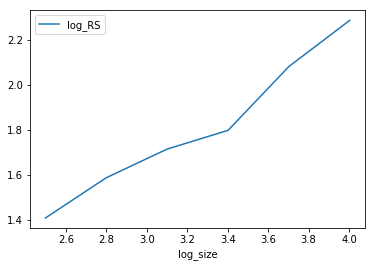

In [66]:
df_average_rescaled[['log_size', 'log_RS']].plot(x = 'log_size', y = 'log_RS')

### Calculate the slope of the data to find the Hurst exponent

In [67]:
slopes = []

for i in range(len(ranges)):
    if i < len(ranges) - 1:
        y2 = df_average_rescaled['log_RS'][i]
        y1 = df_average_rescaled['log_RS'][i + 1]
        x2 = df_average_rescaled['log_size'][i]
        x1 = df_average_rescaled['log_size'][i + 1]
        slopes.append((y2 - y1) / (x2 - x1))

H = np.median(slopes)
H

0.5953042861479183

### Extra - Fractal dimension

In [68]:
fractalDimension = 2 - H
fractalDimension

1.4046957138520817